# Prosjektoppgave SOK-1003

Vi har valgt å lage en kalkulator som regner ut et annuitetslån. Vi valgte dette temaet fordi vi får se hvordan et annuitetslån fungerer og siden vi følte at det var relevant kunnskap å ha med seg som samfunnsøkonomer. Vi får sett fordeler og ulemper med et sånt lån både for banken og konsumenten, og i hvilke situasjoner det vil lønne seg med et annuitetslån kontra et serielån.

Et annuitetslån er et lån der man betaler samme beløp hver termin. Altså at terminbeløpet er konstant. Renten og avdraget derimot varierer hver termin. I motsetning til et serielån, der avdraget er konstant hele tilbakebetalingsperioden, vil avdraget gradvis øke gjennom tilbakebetalingsperioden. I og med at terminbeløpet er konstant, må rentebeløpet synke med samme beløp som avdraget øker. 

Det er laget samme type kalkulator av ulike banker som man kan bruke fritt på nettsidene. Disse har vi sett på for å se hvilke argumenter som påvirker renten, og brukt det som inspirasjon for vår oppgave.

Da vi har jobbet med å finne hva slags kode som kan brukes for å løse problemstillingen vår har vi hatt flittig bruk av google. Der har vi funnet forumposter med folk som har liknende problemer med koden sin, og hvordan de har fått hjelp til å løse dette. Vi har også brukt cheat sheets for pakkene vi bruker, for å se hva slags funksjoner de har og hva man trenger å fylle ut for å få resultatet vi ønsker. For å finne ut hvordan kalkulatoren skal få riktig resultat har vi funnet matteformler for terminbeløp i annuitetslån på matematikk.org.  


Som utgangspunkt for oppgaven brukte vi det vi har lært i seminarene til å lage en mal for oppgaven. Vi lastet også ned nødvendige datapakker: numpy, matplotlib og tabulate. Dette gjorde vi for å kunne utføre de nødvendige funksjonene som vi trengte for å løse oppgaven. Kalkulatoren vi lagde stiller noen spørsmål som søkeren på lånet må svare på som er med på å påvirke hvordan lånet vil bli seende ut. Koden stiller følgende spørsmål: hvor mye personen skal låne, hvor mange år søkeren skal bruke på å tilbake betale lånet, hvor mye personen har i egenandel, hvor mange barn søkeren har, antall biler og hvor mye gjeld. Deretter har vi brukt «If» betingelser for å bestemme renten basert på hvilke betingelser som er oppfylt. F.eks. har personen 0 barn og 0 biler hvil renten ganges 1.03 og øker dermed litt. For at kalkulatoren skulle fungere måtte vi også definere ulike begreper ved hjelp av formler. 

For terminbeløpet brukte vi en formel som vi fant på matematikk.org som nevnt tidligere i oppgaven. Vi sleit litt med å finne ut hvordan man kunne regne ut avdragsdelen, rentebeløpsdelen samt resterende lån etter hver termin, men fant til slutt en måte å regne seg frem til det. Vi visste hvordan vi kunne regne ut tallene ved første termin. Vi visste at rl0(resterende lån før første tilbakebetaling) var samme beløp som størrelsen på lånet så vi satte rl0=loan. Rb0(rentebeløp ved første tilbakebetaling) satte vi lik (rente-1)*loan og ad0(avdrag ved første tilbakebetaling) satte vi lik terminbeløp-rb0. For å få tallene etter hver termin brukte vi en for-løkke der vi definerte alle begrepene med formler basert på de første tilbakebetalingene.  

Til slutt plottet vi 4 figurer, 1 for terminbeløp, 1 for resterende lån etter hver termin, 1 for rentebeløp og 1 for avdragsbeløp. Og under plottet vi en tabell med hjelp fra tabulate-funksjonen som viser tallene ved hver termin for å få det oversiktlig.

In [1]:
# Her importerer vi pakkene vi trenger
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np

# Her lager vi "kalkulator" funksjonen som skal brukes. 
def kalkulator():
    years = np.array([])
    print("Skirv inn størrelse på lånet")
    tb = np.array([]) #terminbeløp
    loan = int(input())
    print("Skriv inn termin i år")
    y = int(input())
    print("Skriv inn antall barn")
    kids = int(input())
    print("Skriv inn antall Biler")
    car = int(input())
    print("Hvor mye gjeld har du?")
    gjeld = int(input())
    rente = 1.019
    ad = np.array([]) #Avdrag 
    rb = np.array([]) #Rentebeløp
    rl = np.array([]) #Resterende lån 
    rl0 = np.array([]) 
    ad0 = np.array([]) #Avdrag ved første tilbakebetaling
    rb0 = np.array([])
    # Her er faktorene som påvirker rentebeløpet.
    if kids >2 and car >1:
        rente = rente*1.10
    if kids ==2 and car ==1:
        rente = rente*1.07
    if kids ==1 and car ==1:
        rente = rente *1.05
    if kids >0 or car >0:
        rente = rente * 1.03
    if gjeld >100000:
        rente = rente*1.11
    for i in range(y):
        years = np.append(years, i)
    
    
    tb = np.append(tb, (loan*(rente)*((1/rente)-1))/(((1/rente)**(y))-1))
 
    
    rl0 = loan
    rb0 = (rente-1)*loan
    ad0 = tb-rb0
    
    rl = rl0
    rb = rb0
    ad = ad0
    

    adv = []
    rbv = []
    rlv = []
    for j in range(y):
        rl = rl-ad
        rlv.append(rl)
        rb = (rente-1)*rl
        rbv.append(rb)  
        ad = tb-rb
        adv.append(ad)
        
    
    
    
    
    tid1 = []
    for i in range(y):
        t = i
        tid1.append(t)
    
    
    #skille mellom 

    #Få tak i elementet som er på plass nummer i og angi verdien 
    #Gjøre det med hver av de 3 vektorene som er definert.
        
        
    
    plt.bar(tid1, tb, color = "black",
           width=0.5)
    plt.title("Terminbeløp")
    plt.show()
    
    print(tb)
    
    plt.plot(tid1, rlv, color = "black")
    plt.title("Resterende lån etter hver termin")
    plt.show()
    print(tabulate(rlv, headers= ("Termin", "Resterende lån"), tablefmt='fancy_grid', showindex=True))
    
    plt.plot(tid1, rbv, color = "black")
    plt.title("Rentbeløp hver termin")
    plt.show()
    print(tabulate(rbv, headers= ("Termin", "Rentebeløp"), tablefmt='fancy_grid', showindex=True))
    
    plt.plot(tid1, adv, color = "black")
    plt.title("Avdragsbeløp hver termin")
    plt.show()
    print(tabulate(adv, headers= ("Termin", "Avdrag"), tablefmt='fancy_grid', showindex=True))

Skirv inn størrelse på lånet


 5000000


Skriv inn termin i år


 10


Skriv inn antall barn


 1


Skriv inn antall Biler


 0


Hvor mye gjeld har du?


 100000


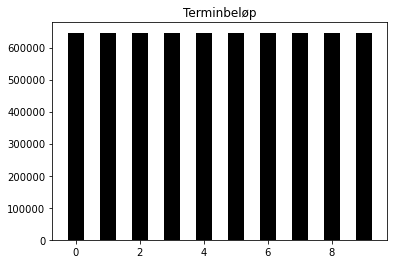

[646171.41220868]


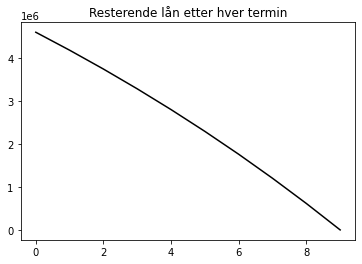

╒══════════╤══════════════════╕
│   Termin │   Resterende lån │
╞══════════╪══════════════════╡
│        0 │      4.60168e+06 │
├──────────┼──────────────────┤
│        1 │      4.18361e+06 │
├──────────┼──────────────────┤
│        2 │      3.74482e+06 │
├──────────┼──────────────────┤
│        3 │      3.28428e+06 │
├──────────┼──────────────────┤
│        4 │      2.80091e+06 │
├──────────┼──────────────────┤
│        5 │      2.29358e+06 │
├──────────┼──────────────────┤
│        6 │      1.7611e+06  │
├──────────┼──────────────────┤
│        7 │      1.20223e+06 │
├──────────┼──────────────────┤
│        8 │ 615653           │
├──────────┼──────────────────┤
│        9 │      1.16415e-09 │
╘══════════╧══════════════════╛


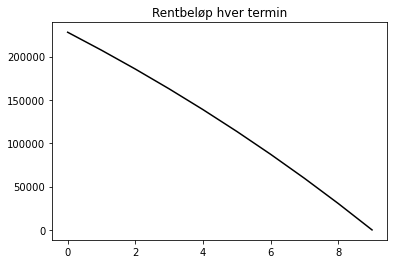

╒══════════╤══════════════════╕
│   Termin │       Rentebeløp │
╞══════════╪══════════════════╡
│        0 │ 228105           │
├──────────┼──────────────────┤
│        1 │ 207382           │
├──────────┼──────────────────┤
│        2 │ 185631           │
├──────────┼──────────────────┤
│        3 │ 162802           │
├──────────┼──────────────────┤
│        4 │ 138841           │
├──────────┼──────────────────┤
│        5 │ 113693           │
├──────────┼──────────────────┤
│        6 │  87297.9         │
├──────────┼──────────────────┤
│        7 │  59594.6         │
├──────────┼──────────────────┤
│        8 │  30517.9         │
├──────────┼──────────────────┤
│        9 │      5.77071e-11 │
╘══════════╧══════════════════╛


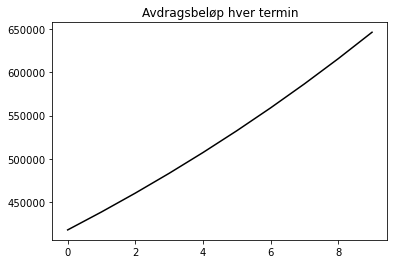

╒══════════╤══════════╕
│   Termin │   Avdrag │
╞══════════╪══════════╡
│        0 │   418066 │
├──────────┼──────────┤
│        1 │   438790 │
├──────────┼──────────┤
│        2 │   460541 │
├──────────┼──────────┤
│        3 │   483370 │
├──────────┼──────────┤
│        4 │   507330 │
├──────────┼──────────┤
│        5 │   532479 │
├──────────┼──────────┤
│        6 │   558873 │
├──────────┼──────────┤
│        7 │   586577 │
├──────────┼──────────┤
│        8 │   615653 │
├──────────┼──────────┤
│        9 │   646171 │
╘══════════╧══════════╛


In [2]:
kalkulator()